<a href="https://colab.research.google.com/github/koalalovepabro/Kaggle-Study/blob/main/Dogs_vs_Cats_keras_%2301_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Kernel for someone want to deep dive into image classification. I use CNN for classification model. If you found this Kernel helpful please up vote it. If you have some feedback and question don't forget to comment below. 

I have simplier model with 
* https://www.kaggle.com/uysimty/get-start-image-classification

# Import Library

In [ ]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img # 이미지 데이터의 배치를 생성, 이미지 전처리에 사용
from keras.utils import to_categorical # 여러 개의 Y값을 0과 1로만 이루어진 형태로 바꿔주는 one-hot-encoding
from sklearn.model_selection import train_test_split # scikit-learn 패키지 중 model_selection에 데이터 분할을 위한 train_test_split 함수
import matplotlib.pyplot as plt
import random
import os # os.listdir을 쓰기 위해서
print(os.listdir("../input")) # input 디렉토리 내에 있는 모든 파일 및 디렉토리 '리스트'를 가져와서 indexing 한다.


Using TensorFlow backend.


['dogs-vs-cats']


# Define Constants

In [ ]:
FAST_RUN = False # 나중에 사용됨
IMAGE_WIDTH=128 # 이미지 넓이 (행)
IMAGE_HEIGHT=128 # 이미지 높이 (열)
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3 # 이미지 channel(depth) - RGB

# Prepare Traning Data

In [ ]:
filenames = os.listdir("../input/dogs-vs-cats/train/train") # os.listdir은 디렉토리 내에 있는 모든 파일 및 디렉토리 리스트를 가져와서 indexing 한다.

# 빈 list를 한개 만든다
categories = []

# filenames에 있는 list들을 한개씩 받아온다.
for filename in filenames:
  # .으로 split하고 0번째에 있는 것을 category 변수에 저장 ( dog 또는 cat으로 저장될 것 )
  category = filename.split('.')[0]
  if category == 'dog':
    categories.append(1)  # 강아지면, categories 리스트에 1을 추가 ( OHE 효과 )
  else:
    categories.append(0)  # 강아지가 아니면 (고양이면), categories 리스트에 0을 추가 ( OHE 효과 )

# 데이터 프레임 만들기 - filename col에 filenames value 넣고, category col에 categories value 넣기
df = pd.DataFrame({
    'filename' : filenames,
    'category' : categories 
})

In [ ]:
filenames # 형태 보기
# 주의: filenames는 list이기 때문에 shape, head() attribute를 갖지 않음

['cat.12461.jpg',
 'dog.3443.jpg',
 'dog.7971.jpg',
 'dog.10728.jpg',
 'dog.1942.jpg',
 'dog.375.jpg',
 'cat.10176.jpg',
 'cat.8194.jpg',
 'dog.3259.jpg',
 'cat.3498.jpg',
 'dog.790.jpg',
 'cat.891.jpg',
 'cat.6912.jpg',
 'dog.6319.jpg',
 'cat.6932.jpg',
 'cat.2842.jpg',
 'dog.10577.jpg',
 'cat.8762.jpg',
 'dog.9079.jpg',
 'dog.10063.jpg',
 'cat.10692.jpg',
 'dog.8013.jpg',
 'cat.7083.jpg',
 'dog.4329.jpg',
 'cat.1.jpg',
 'dog.704.jpg',
 'cat.9820.jpg',
 'cat.115.jpg',
 'dog.10500.jpg',
 'dog.8299.jpg',
 'cat.3921.jpg',
 'dog.6281.jpg',
 'cat.6212.jpg',
 'dog.3593.jpg',
 'dog.7685.jpg',
 'cat.11191.jpg',
 'cat.7488.jpg',
 'dog.8597.jpg',
 'cat.4414.jpg',
 'cat.8583.jpg',
 'cat.9604.jpg',
 'cat.4420.jpg',
 'cat.7659.jpg',
 'cat.12465.jpg',
 'cat.9236.jpg',
 'dog.3287.jpg',
 'cat.10448.jpg',
 'dog.11327.jpg',
 'cat.8358.jpg',
 'cat.2939.jpg',
 'dog.9324.jpg',
 'cat.3949.jpg',
 'dog.83.jpg',
 'dog.6784.jpg',
 'dog.1494.jpg',
 'cat.3673.jpg',
 'cat.11368.jpg',
 'dog.6744.jpg',
 'cat.9015.j

In [ ]:
len(filenames)  # 총 25,000개의 데이터가 있음을 확인

25000

In [ ]:
df.head() # filename별로 category가 잘 저장된 것을 확인

,filename,category
0,cat.12461.jpg,0
1,dog.3443.jpg,1
2,dog.7971.jpg,1
3,dog.10728.jpg,1
4,dog.1942.jpg,1


In [ ]:
df.tail() # filename별로 category가 잘 저장된 것을 확인 // 25000개의 data가 있음을 알 수 있다.

,filename,category
24995,cat.3664.jpg,0
24996,dog.1783.jpg,1
24997,dog.9392.jpg,1
24998,dog.1631.jpg,1
24999,dog.6938.jpg,1


### See Total In count

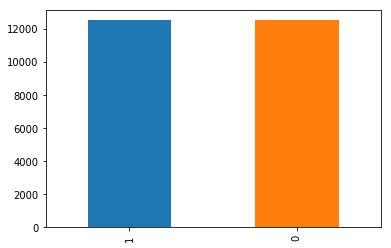

In [ ]:
df['category'].value_counts().plot.bar()
# df 데이터프레임에 있는 category col에 있는 value들을 count 해서 bar plot 그리기
# 개와 고양이가 몇 마리씩 되는지 대략 알 수 있다.

In [ ]:
df['category'].value_counts()

1    12500
0    12500
Name: category, dtype: int64

# See sample image

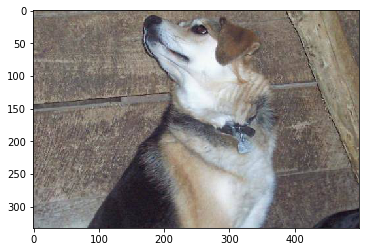

In [ ]:
# random.choice를 사용하기 위해 위에서 import random을 사용
# 내가 가지고 있던 디렉터리에 있는 list 중에서 아무거나 1개 sampling
sample = random.choice(filenames)

# from keras.preprocessing.image import ImageDataGenerator, load_img를 쓴 이유
image = load_img("../input/dogs-vs-cats/train/train/"+sample)
plt.imshow(image) # image 출력

# Build Model

<img src="https://i.imgur.com/ebkMGGu.jpg" width="100%"/>

* **Input Layer**: It represent input image data. It will reshape image into single diminsion array. Example your image is 64x64 = 4096, it will convert to (4096,1) array.
* **Conv Layer**: This layer will extract features from image.
* **Pooling Layer**: This layerreduce the spatial volume of input image after convolution.
* **Fully Connected Layer**: It connect the network from a layer to another layer
* **Output Layer**: It is the predicted values layer. 

In [ ]:
from keras.models import Sequential # sequential model은 layer를 선형으로 연결하여 구성한다. 
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
# ㄴ keras.layers에서 pooling, dropout등 cnn을 구성하는데 쓰이는 방법들을 import

model = Sequential() # 가장 자주 사용하는 구조인 층을 순서대로 쌓아 올린 네트워크{keras 사용 - 모델을 정의(생성)}


# Convolution
# 인공신경망 모델을 효율적으로 학습시키기 윈한 개선 방법들 (BatchNormalization, Dropout, ModelEnsemble)

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
# 32는 convolution filter 수 // (3,3): kernel_size. --> 즉, convolution kernel의 (행,열)
# activation function(활성화 함수)은 relu를 사용
# ㄴ sigmoid보다 relu 함수를 사용하는 이유: 신경망이 깊어 질수록 학습이 어렵기 때문에 전체 계층을 한번 계산한 후 그 계산된 값을 다시 계산하는
#    역전파(Back Propagation)이라는 방법을 사용하는데 sigmoid함수를 activation function으로 사용할 경우, 계층이 깊어지면 Gradient Vanishing(기울기 소실)문제가
#    발생하기 때문에 relu 함수를 사용한다.

# 만들어진 모델은 입력 형태에 대한 정보가 필요하기에 Sequential model의 첫 번째 layer는 입력 형태에 대한 정보를 받아야한다.
# 두 번째 이후의 layer들은 자동으로 형태를 추정할 수 있기에 input_shape문을 쓸 필요가 없다.
# input_shape에는 batch dimension은 포함되지 않는다.

model.add(BatchNormalization())            # 인공신경망에 입력값을 평균0, 분산1로 정규화해서 네트워크의 학습이 잘 일어나도록 돕는다.
model.add(MaxPooling2D(pool_size=(2, 2)))  # 2 by 2 filter로 max pooling (이미지 사이즈를 줄여주며, 좁은 부분을 자세히 (더 많이) 볼 수 있다.)
model.add(Dropout(0.25))                   # 과적합을 방지하기 위해 activation을 0.25의 확률로 지워버린다. ( 랜덤으로 노드 삭제 )



model.add(Conv2D(64, (3, 3), activation='relu')) # filter수가 늘어남 (64)
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))



model.add(Conv2D(128, (3, 3), activation='relu')) # filter수가 더 늘어남 (128)
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


# Classifier
model.add(Flatten()) # - 이 층에는 학습되는 가중치가 없고 데이터를 변환하기만 한다.(1차원 vector으로 바꿈) - 평탄화
                     # - 이 층은 하나의 layer에 있는 모든 뉴런을 또 다른 layer의 모든 뉴런과 연결 시켜준다.
model.add(Dense(512, activation='relu')) # dense로 층을 쌓음 - 첫번째 Dense층은 512개의 노드를 가짐 (하이퍼 파라미터)
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2: because we have cat and dog classes
                                          # 마지막 층은 2개의 노드의 소프트맥스층 : 이 층은 2개의 확률을 반환하고 반환된 값의 전체 합은 1이다. 
                                          # 각 노드는 현재 이미지가 2개 클래스 중 하나에 속할 확률을 출력
                                          # 만약 compile할때 loss='binary_crossentropy'로 설정했다면, 1이 되어야 함
            
# Compile ( 학습 과정 설정 )
model.compile(loss='categorical_crossentropy', # loss: 손실함수, 가중치 텐서를 학습하기 위한 피드백 신호로 사용되며 훈련하는 동안 최소화 된다.
                                               #       미니 배치 확률적 경사 하강법을 통해 손실이 감소됨.
              optimizer='rmsprop',             # optimizer: 데이터와 손실 함수를 바탕으로 모델의 업데이트 방법을 결정
                                               # rmsprop: 과거의 모든 기울기를 균일하게 더하지 않고 새로운 기울기의 정보만 반영하도록 해서 학습률이 크게 떨어져 0에 가까워지는 것을 방지하는 방법
              metrics=['acc']             
             ) 

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
__________

# Callbacks

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau # 학습 조기종료를 사용하기 위해 import

**Early Stop**

To prevent over fitting we will stop the learning after 10 epochs and val_loss value not decreased

- 학습 횟수(epoch)가 많을수록 학습 데이터에 관한 오차는 작아지지만, 이것이 `overfitting`을 초래해서 모델의 "일반화" 성능이 떨어짐
- "이전 epoch 때와 비교해서 '오차가 증가했다면' 학습을 중단한다" 라는 방법인데, 

  **주의할점 :** 오차값은 각 epoch마다 올라가기도 하고 내려가기도 하며, Dropout을 적용한 경우에는 아직 학습이 되지 않은 뉴런이 존재할 가능성이 있기때문에 오차값이 상하로 움직이게 된다.
- 따라서 "어떤 일정한 epoch 수를 거듭하면서 계속해서 오차가 증가하면 학습을 중단한다"라는 방식으로 구현해야 함
- 아래의 예시를 보면, patience는 오차가 증가하는, 즉, "개선이 없는 epoch 수"가 patience에 지정된 수만큼 지속될 경우 학습을 종료시키기 위해 사용한다.
- 모델을 학습시키기 전에 다음과 같이 선언한다.
  - 그 다음 아래에 code를 보면 `model.fit()`이 있는데, `callbacks=early_stopping`을 사용하면 된다.
  - EarlyStopping은 callback 함수이다.
  - callback함수: 어떤 함수를 수행할 시, 그 함수에서 내가 지정한 함수를 호출하는 것
  - `earlystop = EarlyStopping(patience=10)` : 학습 조기종료를 뜻함 ->  
  overfitting을 막기위해서 10 epoch만큼 거슬러 올라가 볼때 "valication loss값이 감소하지 않으면, 학습을 중단하라"라는 의미.

In [ ]:
# 학습 조기종료
earlystop = EarlyStopping(patience=10)

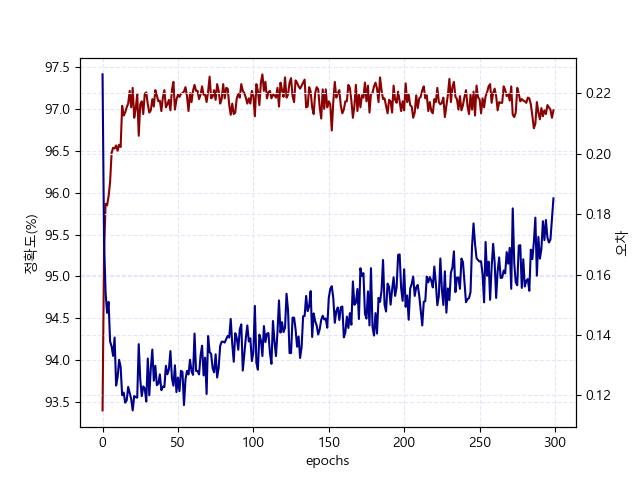

![python image2](https://tykimos.github.io/warehouse/2017-7-9-Early_Stopping_4.png)

In [ ]:
earlystop

**Learning Rate Reduction**

We will reduce the learning rate when then accuracy not increase for 2 steps

In [ ]:
# 학습률을 자동으로 감소시키기
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                           patience=2,
                                           verbose=1,
                                           factor=0.5,  # 콜백이 호출될 때, 학습률을 50%로 줄임 (기존 학습룰 * 0.5)
                                           min_lr=0.00001
                                           )

- monitor : 관찰하고자 하는 항목입니다. ‘val_loss’나 ‘val_acc’가 주로 사용됩니다.  
-> ✨버전 바뀌면서 val_accuracy로 변경됨 !!  ( 코랩에서는 accuracy를 쓰라고 하고, Kaggle에서는 다시 acc를 쓰라고 함...)
- min_delta : 개선되고 있다고 판단하기 위한 최소 변화량을 나타냅니다. 만약 변화량이 min_delta보다 적은 경우에는 개선이 없다고 판단합니다.
- patience : 개선이 없다고 바로 종료하지 않고 개선이 없는 에포크를 얼마나 기다려 줄 것인 가를 지정합니다. 만약 10이라고 지정하면 개선이 없는 에포크가 10번째 지속될 경우 학습일 종료합니다.
- verbose : 얼마나 자세하게 정보를 표시할 것인가를 지정합니다. (0, 1, 2)
- mode : 관찰 항목에 대해 개선이 없다고 판단하기 위한 기준을 지정합니다. 예를 들어 관찰 항목이 ‘val_loss’인 경우에는 감소되는 것이 멈출 때 종료되어야 하므로, ‘min’으로 설정됩니다.
  - auto : 관찰하는 이름에 따라 자동으로 지정합니다.
  - min : 관찰하고 있는 항목이 감소되는 것을 멈출 때 종료합니다.
  - max : 관찰하고 있는 항목이 증가되는 것을 멈출 때 종료합니다.

- 모델은 학습이 정체되면 학습 속도를 2~10배 감소시키는 '이점'이 있다.
- 이때, `ReduceLROnplateau`는 수량을 모니터링하며 patience 수의 epoch수가 '개선되지 않으면'(오차가 증가하면) 학습률이 감소한다.

In [ ]:
callbacks = [earlystop, learning_rate_reduction] # callback에 2개의 함수를 저장 (학습 조기 종료 , 학습률 자동 감소)

In [ ]:
callbacks

# Prepare data

Because we will use image genaretor `with class_mode="categorical"`. We need to convert column category into string.  
Then imagenerator will convert it one-hot encoding which is good for our classification. 

So we will convert 1 to dog and 0 to cat

In [ ]:
# 0, 1로 OHE 했던 레이블 값을 다시 string으로 변환하기 ( 0은 cat으로 1은 dog로 )
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'})

# 이유: image generator를 사용할 것이기 때문이고,
#       image generator는 classification에 적합한 one-hot encoding을 변환한다.

In [ ]:
df.head() # category 확인

,filename,category
0,cat.12461.jpg,cat
1,dog.3443.jpg,dog
2,dog.7971.jpg,dog
3,dog.10728.jpg,dog
4,dog.1942.jpg,dog


In [ ]:
# train & validation 데이터 분할
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)

# df: 분할시킬 data (DataFrame)
# test_size: test dataset의 비율이나 갯수(default=0.25) -> 여기서는 validation set이라 할 수 있다.
# random state: 데이터 분할시 셔플이 이루어지는데 이를 위한 시드값
# shuffle: 셔플여부설정 (default=True)

# 인덱스 리셋 & drop=True : 인덱스로 셋팅한 열은 데이터 프레임에서 삭제
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [ ]:
train_df.head() 

,filename,category
0,dog.1260.jpg,dog
1,cat.2883.jpg,cat
2,dog.383.jpg,dog
3,dog.4192.jpg,dog
4,dog.12011.jpg,dog


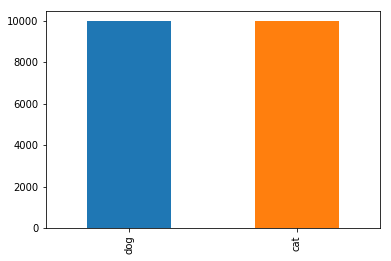

In [ ]:
train_df['category'].value_counts().plot.bar() # train set의 cat과 dog의 빈도수를 plotbar로 시각화

In [ ]:
train_df['category'].value_counts()

dog    10001
cat     9999
Name: category, dtype: int64

In [ ]:
validate_df.head()

,filename,category
0,cat.6621.jpg,cat
1,dog.6904.jpg,dog
2,cat.3468.jpg,cat
3,dog.2189.jpg,dog
4,cat.1610.jpg,cat


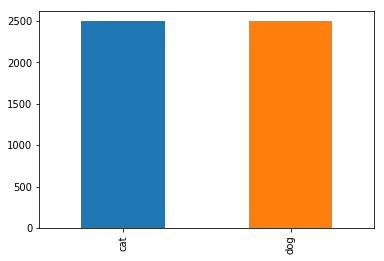

In [ ]:
validate_df['category'].value_counts().plot.bar() # validation set의 cat과 dog의 빈도수를 plotbar로 시각화

In [ ]:
validate_df['category'].value_counts()

cat    2501
dog    2499
Name: category, dtype: int64

In [ ]:
# train_df, validate_df의 shape 확인
print(train_df.shape) 
print(validate_df.shape) 

(20000, 2)
(5000, 2)


In [ ]:
total_train = train_df.shape[0]        # 20,000 개
total_validate = validate_df.shape[0]  #  5,000 개
batch_size=128

# Traning Generator

In [ ]:
# 데이터 증식 ( overfitting 방지, 모델 성능 높이기 위함 ) ; Data Agumentation
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)
# rotation_range : 지정된 각도 "범위"내에서 임의로 원본이미지를 회전시킨다. // 단위:(도) -> 여기서는 15니까, 0도에서 15도 사이
# rescale : 모든 이미지를 255로(픽셀수) 나눠서 스케일 조정
# shear_range : 밀림 강도 범위내에서 임의로 원본이미지를 변형시킴

# zoom_range : 지정된 확대/축소 범위내에서 임의로 원본이미지를 확대/축소. “1 - 수치”부터 “1 + 수치”사이 범위로 확대/축소.
#              예를 들어 0.2이라면, 0.8배에서 1.2배 크기 변화를 시킵니다.

# horizontal_flip : 수평방향으로 뒤집느냐 마느냐

# width_shift_range : 지정된 "수평방향" 이동 범위내에서 임의로 원본이미지를 이동시킴. 수치는 "전체 넓이"의 비율(실수)로 나타냄.
#                     예를 들어 0.1이고 전체 넓이가 100이면, 10픽셀 내외로 "좌우" 이동.

# height_shift_range : 지정된 "수직방향" 이동 범위내에서 임의로 원본이미지를 이동시킴. 수치는 "전체 높이"의 비율(실수)로 나타냄..
#                       예를 들어 0.1이고 전체 높이가 100이면, 10픽셀 내외로 "상하" 이동.

In [ ]:
# dataframe과 디렉터리의 위치를 전달받아 증식/정규화 된 데이터의 "배치" 생성
train_generator = train_datagen.flow_from_dataframe(
    train_df,                             # DataFrame (전체 중에 80%만 있음)
    "../input/dogs-vs-cats/train/train/", # 문자열, 이미지를 읽을 '디렉토리'의 경로 (전체 data가 있음) 
    x_col='filename',                     # train_df 데이터프레임에 filename col의 값들을 가져옴
    y_col='category',                     # train_df 데이터프레임에 category col의 값들을 가져옴
    target_size=IMAGE_SIZE,
    class_mode='categorical',             # 2D numpy array of one-hot encoded labels. Supports multi-label output.
    batch_size=batch_size                 # batch size = 128
)

# ㄴ 20000개의 image가 발견됨. (25000개 중에서 80%인 20000개)

Found 20000 images belonging to 2 classes.


In [ ]:
train_datagen

In [ ]:
train_generator

### Validation Generator

In [ ]:
# validation 데이터는 증식되면 안됨 ! ( rescale만 함 )
# rescale 하는 이유: 정규화 과정임. image가 0~255까지 값을 가지는 2차원 배열인데, 0~255 사이의 값을
#                   0.0과 1.0사이의 값으로 바꾸기 위함이다.
#                   활성화함수 및 오류역전파 알고리즘은 0.0과 1.0사이의 값을 좋아하기 때문이다.
validation_datagen = ImageDataGenerator(rescale=1./255)

# 위에 있는 train_generator와 같다
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "../input/dogs-vs-cats/train/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

# 25000개 중에 20%는 5000개

Found 5000 images belonging to 2 classes.


# See how our generator work

In [ ]:
example_df = train_df.sample(n=1).reset_index(drop=True) # train set인 train_df에서 1개를 sample로 뽑음

# 1개만 가지고 example_generator를 만듦
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "../input/dogs-vs-cats/train/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

# 1개만 샘플했으므로 1개의 class에만 속함

Found 1 images belonging to 1 classes.


In [ ]:
example_df # 뭐가 뽑혔는지 확인

,filename,category
0,dog.6275.jpg,dog


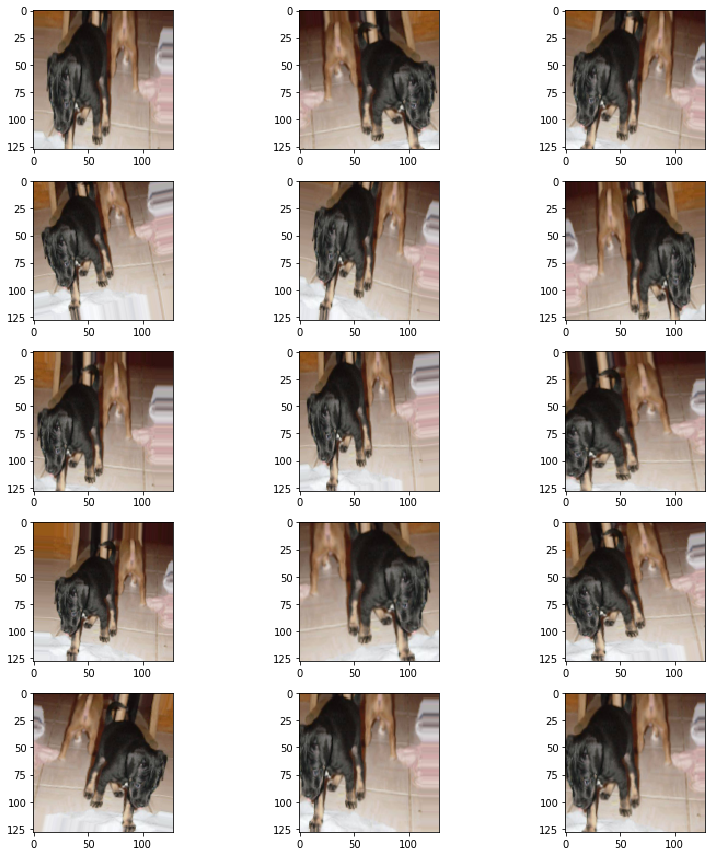

In [ ]:
plt.figure(figsize=(12, 12)) # 출력되는 plot의 윈도우 전체 크기
for i in range(0, 15):
    plt.subplot(5, 3, i+1) # 5행 3열로 구성, i+1은 위치를 뜻함
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()  # 현재 figure상에서 배치되어 있는 놈들의 공백을 적당하게 잘 배치해주는 것. 여기서는 필수적으로 필요한 것은 아니다.
plt.show()

**15개의 이미지가 제각각 변형되어 증식된 것을 확인할 수 있다**


In [ ]:
X_batch.shape # ImageSize = 128x128, channel = 3인 1장의 이미지 (4차원 데이터)

(1, 128, 128, 3)

In [ ]:
X_batch # data가 1개입니다.

array([[[[0.56422794, 0.3339442 , 0.10445347],
         [0.5484675 , 0.32632262, 0.09552177],
         [0.5306455 , 0.3150843 , 0.08798822],
         ...,
         [0.31513268, 0.18179932, 0.14258364],
         [0.31488332, 0.18154998, 0.1423343 ],
         [0.31463397, 0.18130066, 0.14208496]],

        [[0.56026775, 0.3320448 , 0.09489345],
         [0.5502045 , 0.32598144, 0.08816078],
         [0.5341036 , 0.31504524, 0.08117305],
         ...,
         [0.30980393, 0.1764706 , 0.13725491],
         [0.30980393, 0.1764706 , 0.13725491],
         [0.30980393, 0.1764706 , 0.13725491]],

        [[0.5525215 , 0.3180415 , 0.08737139],
         [0.5468118 , 0.31543928, 0.08798828],
         [0.54925185, 0.31787935, 0.09042834],
         ...,
         [0.3086361 , 0.17617865, 0.13842273],
         [0.30813745, 0.17605397, 0.13892142],
         [0.30763873, 0.17592931, 0.1394201 ]],

        ...,

        [[0.90215546, 0.906077  , 0.91392016],
         [0.90518016, 0.9091017 , 0.91694486]

In [ ]:
X_batch[0] # 0번째 data 전체를 뜻함 -> 128행 128열 3channel형태의 1개의 data

array([[[0.56422794, 0.3339442 , 0.10445347],
        [0.5484675 , 0.32632262, 0.09552177],
        [0.5306455 , 0.3150843 , 0.08798822],
        ...,
        [0.31513268, 0.18179932, 0.14258364],
        [0.31488332, 0.18154998, 0.1423343 ],
        [0.31463397, 0.18130066, 0.14208496]],

       [[0.56026775, 0.3320448 , 0.09489345],
        [0.5502045 , 0.32598144, 0.08816078],
        [0.5341036 , 0.31504524, 0.08117305],
        ...,
        [0.30980393, 0.1764706 , 0.13725491],
        [0.30980393, 0.1764706 , 0.13725491],
        [0.30980393, 0.1764706 , 0.13725491]],

       [[0.5525215 , 0.3180415 , 0.08737139],
        [0.5468118 , 0.31543928, 0.08798828],
        [0.54925185, 0.31787935, 0.09042834],
        ...,
        [0.3086361 , 0.17617865, 0.13842273],
        [0.30813745, 0.17605397, 0.13892142],
        [0.30763873, 0.17592931, 0.1394201 ]],

       ...,

       [[0.90215546, 0.906077  , 0.91392016],
        [0.90518016, 0.9091017 , 0.91694486],
        [0.90454996, 0

In [ ]:
X_batch[0,1] # 0번째 데이터의 1번째 행

array([[0.56026775, 0.3320448 , 0.09489345],
       [0.5502045 , 0.32598144, 0.08816078],
       [0.5341036 , 0.31504524, 0.08117305],
       [0.5275398 , 0.31679684, 0.08582406],
       [0.54300547, 0.3327303 , 0.12279404],
       [0.54821104, 0.33562824, 0.13678747],
       [0.54345304, 0.32949892, 0.13140616],
       [0.54023165, 0.32490608, 0.12756135],
       [0.5315385 , 0.32344306, 0.12831791],
       [0.52678937, 0.32344088, 0.11867107],
       [0.52425754, 0.32158783, 0.10820222],
       [0.5170536 , 0.32785457, 0.13669397],
       [0.54129755, 0.36820742, 0.20952302],
       [0.5992899 , 0.44635567, 0.30075032],
       [0.64138675, 0.5048669 , 0.35873422],
       [0.65116143, 0.5104209 , 0.36156973],
       [0.65181476, 0.503639  , 0.35570154],
       [0.65205956, 0.5013962 , 0.35125396],
       [0.58803385, 0.4407042 , 0.2937938 ],
       [0.3848306 , 0.25441602, 0.1408321 ],
       [0.18845695, 0.10351839, 0.03886268],
       [0.19373026, 0.12258171, 0.08450824],
       [0.

In [ ]:
X_batch[0, 1, 0]

array([0.56026775, 0.3320448 , 0.09489345], dtype=float32)

In [ ]:
X_batch[0, 1, 0, 0]

0.56026775

In [ ]:
Y_batch.shape

(1, 1)

In [ ]:
Y_batch

array([[1.]], dtype=float32)

In [ ]:
Y_batch[0]

array([1.], dtype=float32)

In [ ]:
Y_batch[0, 0]

1.0

In [ ]:
print(Y_batch)

[[1.]]


# Fit Model

#### **학습 조기종료 조건**
`earlystop = EarlyStopping(patience=10)`  
-> 10 epoch만큼 거슬러 올라가 볼때 `valication loss`가 감소하지 않으면, 학습 중단


#### **학습률 자동감소 조건**
`learning_rate_reduction = ReduceLROnPlateau ( monitor='val_accuracy', patience=2, verbose=1, factor=0.5, min_lr=0.00001 )`
                                        
-> `val_accuracy`가 2번 연속 높아지지 않으면(감소하면), 바로 학습률 감소 !

In [ ]:
epochs = 3 if FAST_RUN else 50 

history = model.fit_generator( # keras에서는 모델을 학습시킬 때 주로 fit 함수를 사용하지만 generator로
                               # 생성된 batch로 학습시킬 경우에는 fit_generator() 함수를 사용
    
    train_generator,           # 훈련 dataset을 제공할 generator를 지정. 앞서 생성한 train_generator로 지정.
    epochs = epochs,           # 전체 훈련 dataset에 대해 학습 반복 횟수를 지정.
    
    validation_data = validation_generator,        # validation_data에 검증 dataset을 제공한 generator를 지정.
    
    validation_steps = total_validate//batch_size, # validation_steps: 한 번 epoch 돌고나서,validation set을 통해 validation accuracy를 측정할 때
                                                   #                   validation set을 몇 번 볼 것인지

                                                   # total_validate는 val의 data 수.
                                                   # 1,333.33 => total_validate = 20,000개, batch_size = 128
    
    steps_per_epoch = total_train//batch_size,     # steps_per_epoch: 한 번 epoch 돌 때, 데이터를 몇 번 볼 것인지
                                                   # total_train은 train의 data 수.
                                                   # 333.33 => total_train = 5,000개, batch_size = 128
    
    callbacks = callbacks                          # 위에서 지정한 callbacks함수 불러옴
                                                   # callbacks = [earlystop, learning_rate_reduction]
                                                   # callbacks에는 2개의 함수가 저장되어있음 (학습 조기 종료 , 학습률 자동 감소)
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
156/156 [==============================] - 245s 2s/step - loss: 0.8278 - acc: 0.6400 - val_loss: 0.9031 - val_acc: 0.6114
Epoch 2/50
156/156 [==============================] - 130s 834ms/step - loss: 0.5590 - acc: 0.7202 - val_loss: 0.5171 - val_acc: 0.7523
Epoch 3/50
156/156 [==============================] - 130s 832ms/step - loss: 0.4872 - acc: 0.7673 - val_loss: 1.1508 - val_acc: 0.6320
Epoch 4/50
156/156 [==============================] - 130s 833ms/step - loss: 0.4463 - acc: 0.7943 - val_loss: 0.4359 - val_acc: 0.7950
Epoch 5/50
156/156 [==============================] - 130s 831ms/step - loss: 0.4147 - acc: 0.8111 - val_loss: 0.8027 - val_acc: 0.7514
Epoch 6/50
156/156 [==============================] - 129s 828ms/step - loss: 0.3922 - acc: 0.8223 - val_loss: 0.4172 - val_acc: 0.8126
Epoch 7/50
156/156 [==============================] - 130s 831ms/step - loss: 0.3740 - acc: 0.8350 - val_loss: 0.3880 - val_acc: 0.8298
Epo

# Save Model

In [ ]:
# 한번 training을 할 때 대용량 데이터를 트레이닝 한 뒤 model을 save하지 않으면 다시 처음부터
# 트레이닝을 진행해야한다.
model.save_weights("model.h5") # weight를 h5 파일 포맷으로 만들어 저장하기
                               # keras에서는 모델과 weights의 재사용을 위해 이를 파일형태로 저장하는 라이브러리를 제공하며,
                               # 이를 통해 모델과 weights를 파일 형태로 저장하고 불러올 수가 있다.

# Virtualize Training

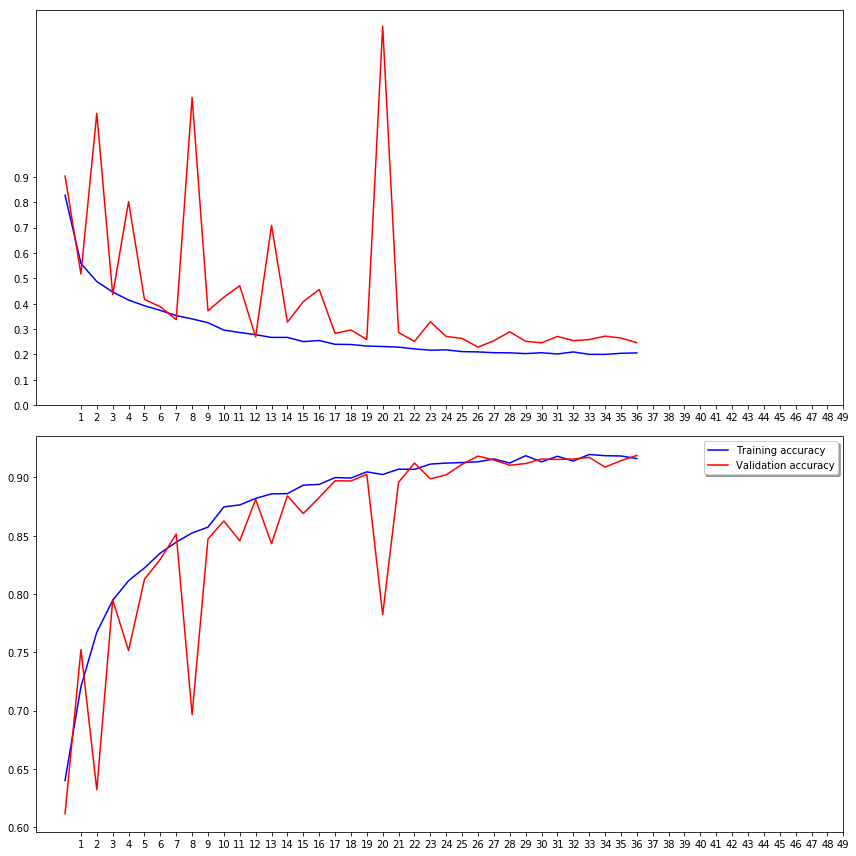

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12)) # 윈도우 나눠서 여러개의 그래프 출력. (2행 1열 구조)

ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['acc'], color='b', label="Training accuracy")
ax2.plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

# Prepare Testing Data

In [ ]:
test_filenames = os.listdir("../input/dogs-vs-cats/test/test") # test에 있는 list들을 가져옴
test_df = pd.DataFrame({                                       # 데이터프레임을 생성
    'filename': test_filenames                                 # filename이라는 col에 test_filenames값을 가져옴
})
nb_samples = test_df.shape[0] # test dataset data 갯수

In [ ]:
test_df.shape

(12500, 1)

In [ ]:
test_df

,filename
0,7981.jpg
1,6234.jpg
2,1269.jpg
3,3863.jpg
4,6241.jpg
5,10304.jpg
6,623.jpg
7,2193.jpg
8,11925.jpg
9,3750.jpg


# Create Testing Generator

In [ ]:
# test 데이터는 증식되면 안됨 ! (rescale만 해줌)
# rescale 하는 이유: 정규화 과정임. image가 0~255까지 값을 가지는 2차원 배열인데, 0~255 사이의 값을
#                   0.0과 1.0사이의 값으로 바꾸기 위함이다.
#                   활성화함수 및 오류역전파 알고리즘은 0.0과 1.0사이의 값을 좋아하기 때문이다.
test_gen = ImageDataGenerator(rescale=1./255)

test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "../input/dogs-vs-cats/test/test/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,  # batch_size = 128
    shuffle=False
)

# shuffle을 쓰지 않음

Found 12500 images.


# Predict

In [ ]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

# test_generator 자리 : 입력 샘플의 batch를 생성하는 생성기
# steps : 중지되기 전까지 generator로부터 얻는 단계의 총 갯수 (샘플의 batch)
# -np.ceil(data) : 소수점 자리 수를 '올림'해서 정수로 만들어줌
# nb_samples : test dataset의 갯수
# batch_size = 128

For categoral classication the prediction will come with probability of each category. So we will pick the category that have the highest probability with numpy average max

In [ ]:
predict

array([[9.2282608e-05, 9.9990773e-01],
       [9.7819865e-01, 2.1801399e-02],
       [4.0110266e-01, 5.9889734e-01],
       ...,
       [1.4386124e-04, 9.9985611e-01],
       [4.9371202e-04, 9.9950624e-01],
       [9.4757503e-01, 5.2424952e-02]], dtype=float32)

In [ ]:
test_df

,filename
0,7981.jpg
1,6234.jpg
2,1269.jpg
3,3863.jpg
4,6241.jpg
5,10304.jpg
6,623.jpg
7,2193.jpg
8,11925.jpg
9,3750.jpg


In [ ]:
np.argmax(predict, axis=-1)

array([1, 0, 1, ..., 1, 1, 0])

For categoral classication the prediction will come with probability of each category.  
So we will pick the category that have the highest probability with numpy average max.

In [ ]:
test_df['category'] = np.argmax(predict, axis=-1)  # axis = -1 에 해당하는 값들 중 가장 큰 값의 인덱스들을 반환
                                                   # 여기에서는 0과 1 중 큰 값인 1을 가진 인덱스를 반환함
                                                   # 1 = dog

In [ ]:
test_df['category']

0        1
1        0
2        1
3        0
4        1
5        1
6        0
7        0
8        0
9        0
10       0
11       1
12       1
13       0
14       1
15       1
16       0
17       1
18       0
19       0
20       1
21       0
22       1
23       1
24       1
25       1
26       0
27       0
28       1
29       0
        ..
12470    0
12471    0
12472    0
12473    1
12474    0
12475    1
12476    0
12477    0
12478    1
12479    0
12480    0
12481    0
12482    1
12483    1
12484    0
12485    0
12486    0
12487    1
12488    1
12489    0
12490    0
12491    0
12492    0
12493    0
12494    0
12495    0
12496    1
12497    1
12498    1
12499    0
Name: category, Length: 12500, dtype: int64

We will convert the predict category back into our generator classes by using `train_generator.class_indices`.<br>It is the classes that image generator map while converting data into computer vision

In [ ]:
test_df

,filename,category
0,7981.jpg,1
1,6234.jpg,0
2,1269.jpg,1
3,3863.jpg,0
4,6241.jpg,1
5,10304.jpg,1
6,623.jpg,0
7,2193.jpg,0
8,11925.jpg,0
9,3750.jpg,0


In [ ]:
dict((v,k) for k,v in train_generator.class_indices.items())

{0: 'cat', 1: 'dog'}

In [ ]:
# 파일 이름 가져 오기
label_map = dict((v,k) for k,v in train_generator.class_indices.items())

test_df['category'] = test_df['category'].replace(label_map) # test_df['category'] 값을 0 or 1 -> cat or dog로 바꿈

From our prepare data part. We map data with `{1: 'dog', 0: 'cat'}`. Now we will map the result back to dog is 1 and cat is 0

In [ ]:
test_df

,filename,category
0,7981.jpg,dog
1,6234.jpg,cat
2,1269.jpg,dog
3,3863.jpg,cat
4,6241.jpg,dog
5,10304.jpg,dog
6,623.jpg,cat
7,2193.jpg,cat
8,11925.jpg,cat
9,3750.jpg,cat


In [ ]:
# test_df['category'] 값을 cat or dog -> 0 or 1로 바꿈
test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })  

In [ ]:
test_df

,filename,category
0,7981.jpg,1
1,6234.jpg,0
2,1269.jpg,1
3,3863.jpg,0
4,6241.jpg,1
5,10304.jpg,1
6,623.jpg,0
7,2193.jpg,0
8,11925.jpg,0
9,3750.jpg,0


### Virtaulize Result

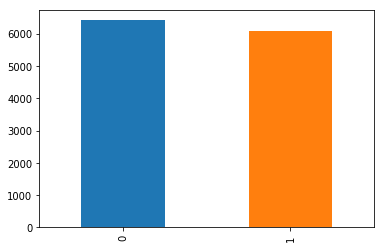

In [ ]:
test_df['category'].value_counts().plot.bar()

In [ ]:
test_df['category'].value_counts()

0    6410
1    6090
Name: category, dtype: int64

### See predicted result with images

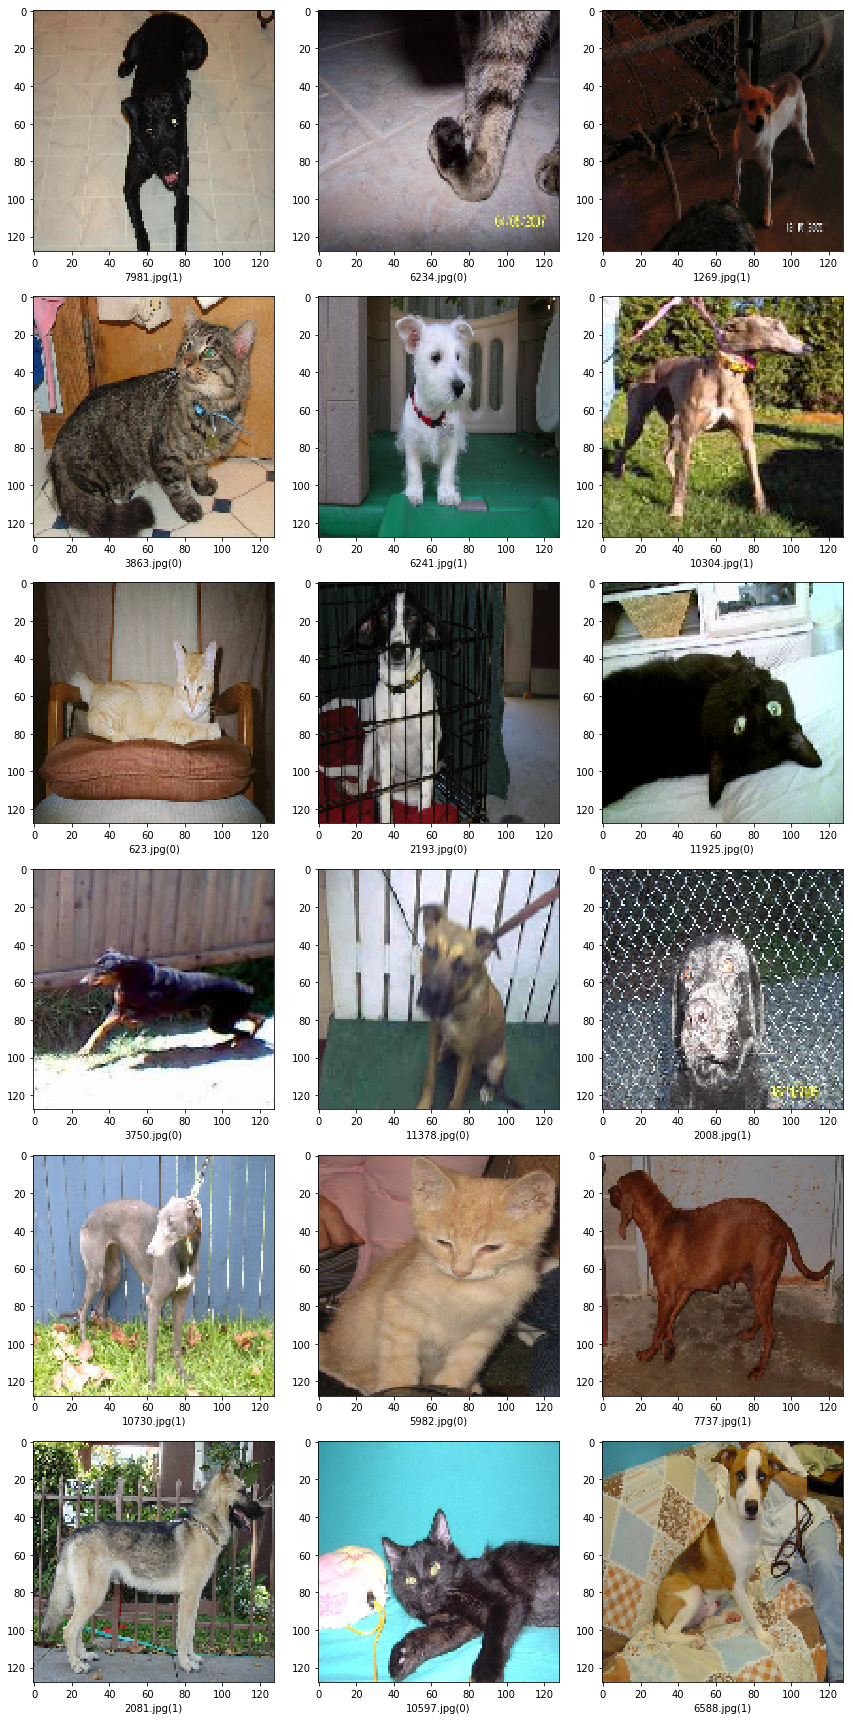

In [ ]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows(): # iterrows: row별로 반환해서 처리
    filename = row['filename']            # filename = 칼럼명 filename의 값들이 1개의 행으로 나열된 형태
    category = row['category']            # category = 칼럼명 category의 값들이 1개의 행으로 나열된 형태
    img = load_img("../input/dogs-vs-cats/test/test/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
    
plt.tight_layout()                        # 자동으로 레이아웃을 맞춰주는 함수 (여백을 알아서 맞춰줌)
plt.show()

In [ ]:
test_df.head(18)

,filename,category
0,7981.jpg,1
1,6234.jpg,0
2,1269.jpg,1
3,3863.jpg,0
4,6241.jpg,1
5,10304.jpg,1
6,623.jpg,0
7,2193.jpg,0
8,11925.jpg,0
9,3750.jpg,0


In [ ]:
sample_test.head()

,filename,category
0,7981.jpg,1
1,6234.jpg,0
2,1269.jpg,1
3,3863.jpg,0
4,6241.jpg,1


# Submission

In [ ]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission.csv', index=False)